## Testando os Dados da EQUINOR

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando dados dos poços:

Foi criado um dicionario em que cada uma de suas chaves (keys) é um poço (pandas dataframe).

In [3]:
dict= {}
vect = [1,4,5,10,11,12,14,15]

for i in vect:
    mud_i = pd.read_csv(f'./Base/MUD_LOG_{str(i)}.csv')
    mud_i = mud_i.assign(mud=i)
    dict[f"mud_{i}"] = mud_i


dict['mud_10'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,147,147.0,8.5,1.43,84.67,87.92,1.00,1.15,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,148,148.0,8.5,1.26,84.67,87.92,0.21,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,149,149.0,8.5,1.65,84.67,87.92,1.00,1.35,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,150,150.0,8.5,1.42,84.67,87.92,1.32,1.34,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,151,151.0,8.5,1.58,84.67,87.92,2.76,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [4]:
dict['mud_1'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,145,145.0,36.0,21.83,36.04,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,146,146.0,36.0,29.00,35.28,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,147,147.0,36.0,41.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,148,148.0,36.0,20.00,35.32,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,149,149.0,36.0,15.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Features



Reduzir as colunas para apenas as listadas abaixo:

DEPT	M	Depth</br>
BDIA 	INCH	Bit Diameter</br>
ROPA 	M/HR	Rate of Penetration, Average</br>
HKLA	TON	Average Hookload </br>
WOBA	TON	Weight on Bit - average</br>
TQA	KNM	Torque A, average</br>
RPMB	RPM	Average Bit RPM</br>
SPPA	BAR	Average Pump Pressure - Stand Pipe</br>
MFIA	L/MN	Mud Flow In - Average</br>
MDIA	G/CC	Mud Density In - Average</br>
MTIA	DEGC	Mud Temperature In - Average (Graus Celsius)</br>
LITH	....	Lithology</br>

In [5]:
dict['mud_11'].rename(columns={'TDEP': 'DEPT'}, inplace=True)

In [6]:
selected_features = ['DEPT', 'BDIA', 'ROPA', 'HKLA', 'WOBA', 'TQA','RPMB','SPPA','MFIA', 'MDIA','MTIA','LITH','mud']
for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'][selected_features]

In [8]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [9]:
print(len(dict))

8


### Estabelecendo condições simulando o Pré-Sal


Apenas limestone (700) e diâmetros de broca 12.25 e 8.5.

In [10]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [11]:
diameters = dict['mud_4']['BDIA'].unique()
diameters

array([36.  , 17.5 , 12.25,  8.5 ])

In [12]:
liths = dict['mud_4']['LITH'].unique()
liths

array([   nan, 600.  , 600.39, 600.17, 600.32, 300.  , 700.  , 800.  ,
       700.17, 600.38, 400.17, 300.23, 400.  ])

Deixando apenas limestone

In [13]:
dict_lime_1225 = {}
dict_lime_85 = {}


for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'].dropna(subset=['LITH'])
    dict_lime_1225[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 12.25 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]
    dict_lime_85[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 8.5 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]

In [14]:
print(len(dict_lime_85))

8


In [15]:
dict_lime_1225.keys()

dict_keys(['mud_1', 'mud_4', 'mud_5', 'mud_10', 'mud_11', 'mud_12', 'mud_14', 'mud_15'])

In [17]:
# Juntando todos os de 1225 em um unico df:

df_all_1225 = pd.DataFrame()
for i in vect:
    df_all_1225 = pd.concat([df_all_1225, dict_lime_1225[f'mud_{i}']])

print('N de Features: ', df_all_1225.shape[1])
df_all_1225.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2596,2741,12.25,19.86,158.58,8.00,23.79,169.0,213.1,3517.33,1.41,16.49,700.0,1
2597,2742,12.25,10.46,158.63,7.96,22.66,167.0,212.5,3517.75,1.41,16.49,700.0,1
2598,2743,12.25,10.37,158.35,8.24,23.19,167.0,212.1,3517.46,1.41,16.49,700.0,1
2599,2744,12.25,3.92,161.31,5.28,18.37,178.0,211.6,3517.35,1.41,16.47,700.0,1
2600,2745,12.25,4.11,160.36,6.23,18.34,179.0,211.0,3517.36,1.41,16.44,700.0,1


In [18]:
# Juntnado todos os de 85 em um unico df:

df_all_85 = pd.DataFrame()
for i in vect:
    df_all_85 = pd.concat([df_all_85, dict_lime_85[f'mud_{i}']])

print('N de Features: ', df_all_85.shape[1])
df_all_85.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


### Função de erro

In [19]:
import pandas as pd
import numpy as np

erros = pd.DataFrame(columns=['Model', 'Parameters', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
erros.head()

,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error


In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

def error_report(y_test, previsoes, model_name, code, erros):
    mae = mean_absolute_error(y_test, previsoes)
    mape = mean_absolute_percentage_error(y_test, previsoes)
    r2 = r2_score(y_test, previsoes)
    mse = mean_squared_error(y_test, previsoes)
    rmse = np.sqrt(mse)

    erros.loc[len(erros.index)]= [model_name, code, mae, mape,r2, mse, rmse]

    print('Mean Absolute Error:', mae)
    print('Mean Absolute percentage Error', mape)
    print('R2 Score', r2)
    print('Root Mean Squared Error', rmse)

### Preparando os dados

In [21]:
X = df_all_85.drop(['ROPA', 'LITH'], axis=1)
y = df_all_85['ROPA']


In [22]:
df_all_85.head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


In [23]:
X.head()

,DEPT,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)

### Support Vector Regression

O SVR é um algoritmo que utiliza os conceitos de máquinas de vetor de suporte (SVM) para prever valores numéricos. O SVR funciona de forma a encontrar um hiperplano, sendo esse formado por uma reta de regressão e uma faixa ε de tolerancia para cima e para baixo. (valores dentro dessas faixas são considerados corretos).
Abaixo definiremos o kernel ('linear', 'rbf', e 'poly'), a penalidade C das violações de margem e a margem em si ε.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parametros_teste = {
    'C': [0.1 , 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr_grid = SVR()
grid_search = GridSearchCV(estimator = svr_grid, param_grid=parametros_teste, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X,y)

melhores_param = grid_search.best_params_
melhores_param

{'C': 10, 'epsilon': 0.0001, 'gamma': 0.0001}

In [41]:
svr_model = grid_search.best_estimator_

y_pred = svr_model.predict(X_test)


In [44]:
error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'poly\', C=10, epsilon = 0.1)', erros)
erros.head()

Mean Absolute Error: 2.0538062776942367
Mean Absolute percentage Error 0.1618926123239372
R2 Score 0.8423035803211103
Root Mean Squared Error 3.695471021162043


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",2.053806,0.161893,0.842304,13.656506,3.695471


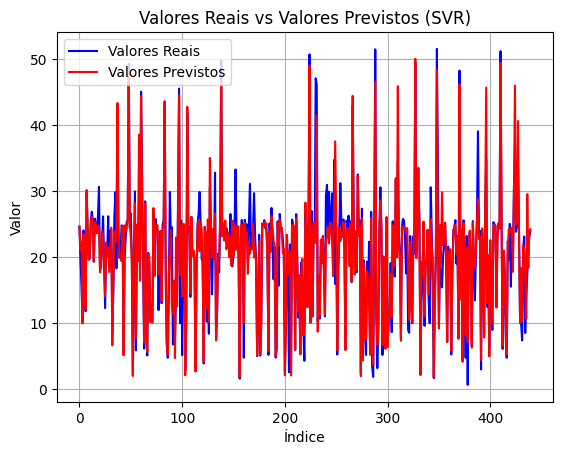

In [35]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (SVR)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# erros = erros.drop(0)

### SHAP: SVR

In [ ]:
# pip install shap

In [36]:
import shap

/home/cmschultz/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(svr_model.predict, background_data_summary)

In [48]:
shap_values = explainer.shap_values(X_test)

 58%|█████▊    | 255/440 [41:05<29:48,  9.67s/it] 


KeyboardInterrupt: 

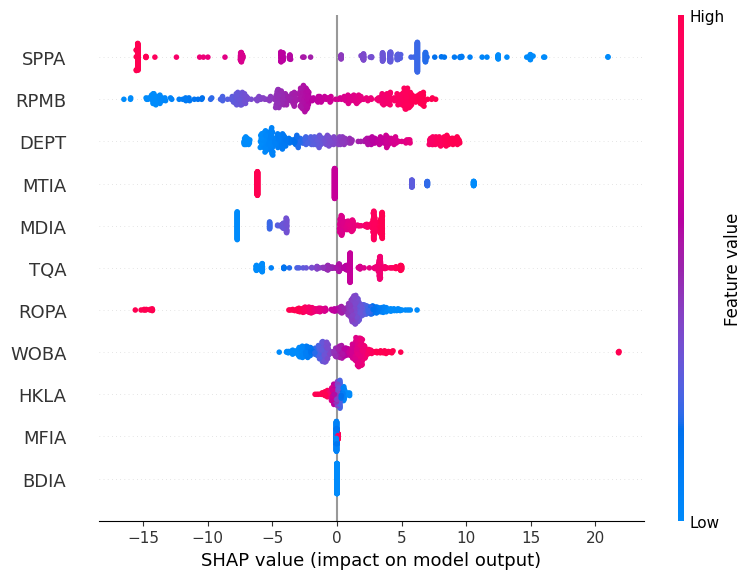

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

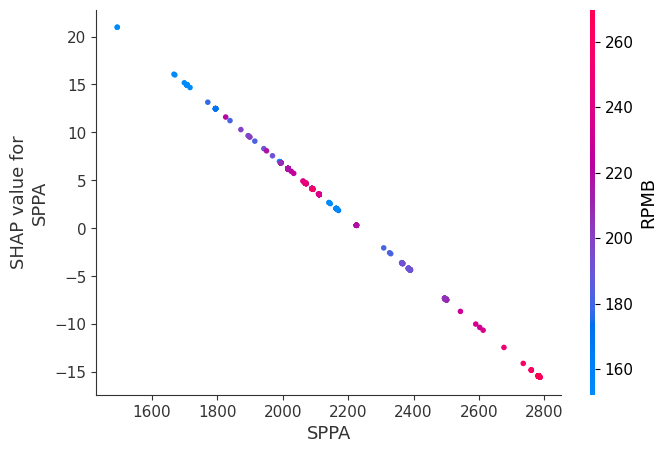

In [ ]:
shap.dependence_plot("SPPA", shap_values, X_test, feature_names=selected_features)

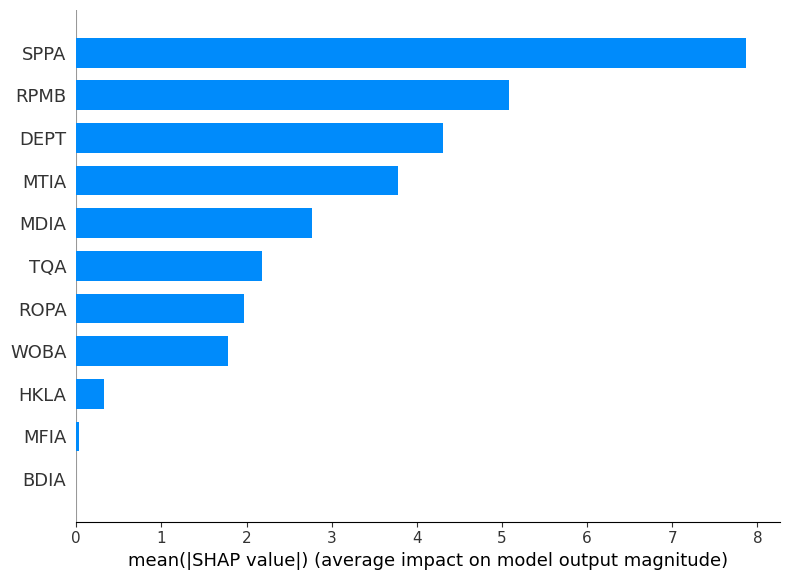

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Random Forest 

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_model = RandomForestRegressor()

In [47]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = rf_model.predict(X_test)

In [49]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'Random Forest Regressor', 'RandomForestRegressor()', erros)
erros.head()

Mean Absolute Error: 1.3140511363636356
Mean Absolute percentage Error 0.09887876520474735
R2 Score 0.9252228673957931
Root Mean Squared Error 2.544739249041763


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",6.108967,0.681236,0.138313,74.622094,8.638408
1,Random Forest Regressor,RandomForestRegressor(),1.330703,0.099221,0.926018,6.406856,2.531177
2,Random Forest Regressor,RandomForestRegressor(),1.314051,0.098879,0.925223,6.475698,2.544739


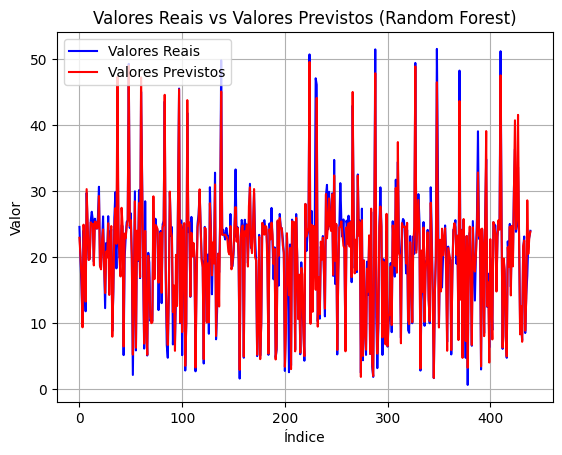

In [50]:
import matplotlib.pyplot as plt
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (Random Forest)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import time

import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



Elapsed time to compute the importances: 0.021 seconds


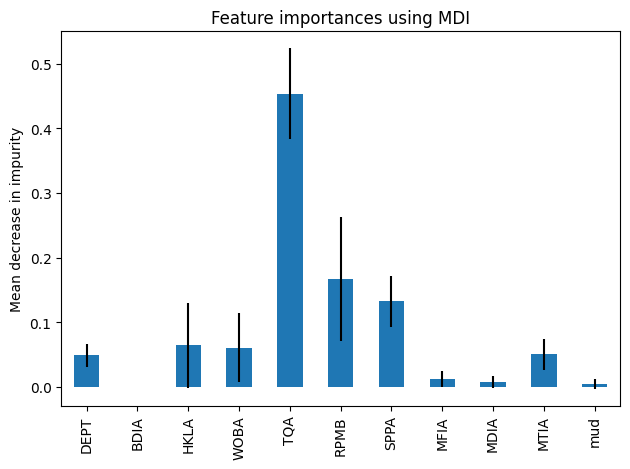

In [44]:
import pandas as pd
feature_names = ['DEPT', 'BDIA', 'HKLA', 'WOBA', 'TQA','RPMB','SPPA','MFIA', 'MDIA','MTIA','mud']

forest_importances = pd.Series(importances, index= feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SHAP: Random Forest

In [75]:
import shap

In [170]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(rf_model.predict, background_data_summary)

In [171]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/440 [00:00<?, ?it/s]

100%|██████████| 440/440 [05:45<00:00,  1.27it/s]


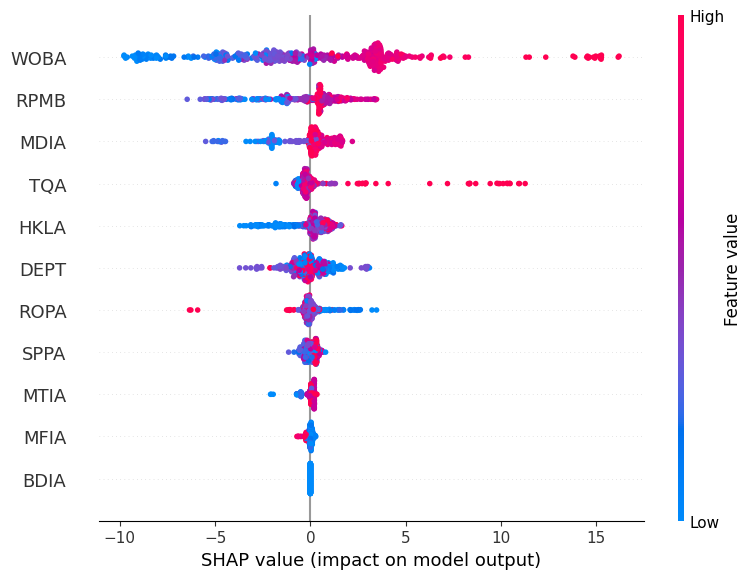

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

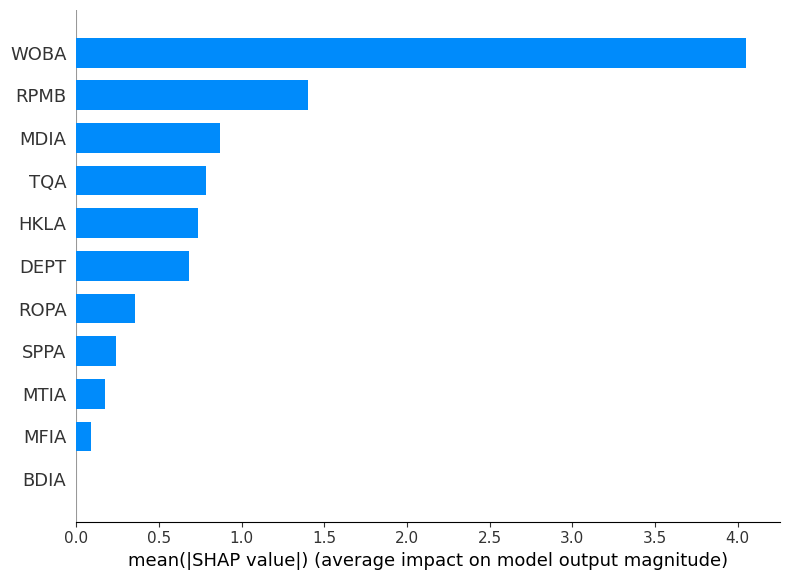

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gb_model = GradientBoostingRegressor()

In [79]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [80]:
y_pred = gb_model.predict(X_test)

In [81]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred,'Gradient Boosting Regressor', 'GradientBoostingRegressor()', erros)
erros.head()

Mean Absolute Error: 1.7650776094692768
Mean Absolute percentage Error 0.14034891168253583
R2 Score 0.9019085789662455
Root Mean Squared Error 2.9145693765257894


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",6.108967,0.681236,0.138313,74.622094,8.638408
1,Support Vector Regression,"SVR(kernel = 'linear', C=1, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
2,Random Forest Regressor,RandomForestRegressor(),1.353706,0.098849,0.922067,6.748979,2.597880
3,Gradient Boosting Regressor,GradientBoostingRegressor(),1.765078,0.140349,0.901909,8.494715,2.914569


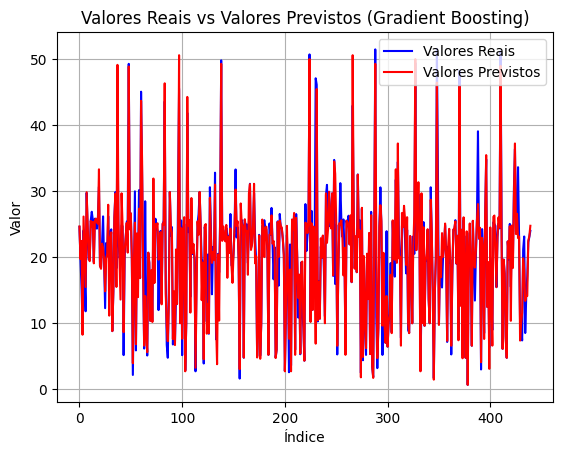

In [87]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (Gradient Boosting)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: Gradient Boosting

In [ ]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(gb_model.predict, background_data_summary)

In [ ]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [02:15<00:00,  3.24it/s]


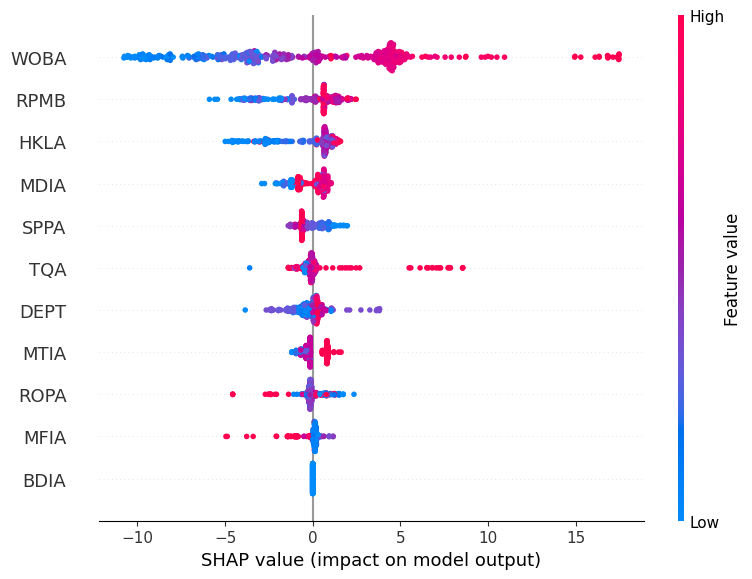

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

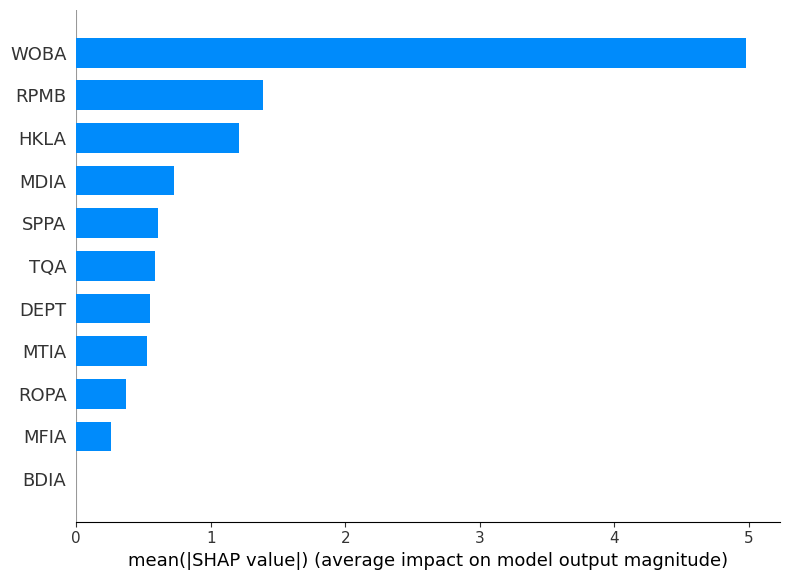

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

In [89]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
y_pred = dt_model.predict(X_test)

In [91]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'Decision Tree', 'dt_model = DecisionTreeRegressor()', erros)
erros.head()

Mean Absolute Error: 1.7130454545454545
Mean Absolute percentage Error 0.11071311030339377
R2 Score 0.8528429143544773
Root Mean Squared Error 3.5698459350509797


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",6.108967,0.681236,0.138313,74.622094,8.638408
1,Support Vector Regression,"SVR(kernel = 'linear', C=1, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
2,Random Forest Regressor,RandomForestRegressor(),1.353706,0.098849,0.922067,6.748979,2.597880
3,Gradient Boosting Regressor,GradientBoostingRegressor(),1.765078,0.140349,0.901909,8.494715,2.914569
4,Decision Tree,dt_model = DecisionTreeRegressor(),1.641432,0.101807,0.863671,11.806094,3.436000


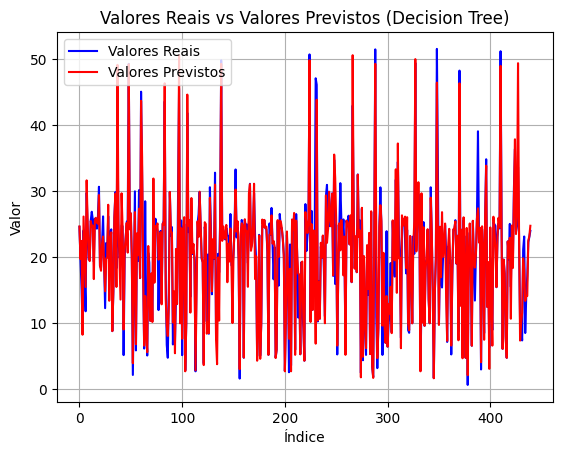

In [92]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (Decision Tree)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: Decision Tree

In [ ]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(gb_model.predict, background_data_summary)

In [ ]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [02:16<00:00,  3.21it/s]


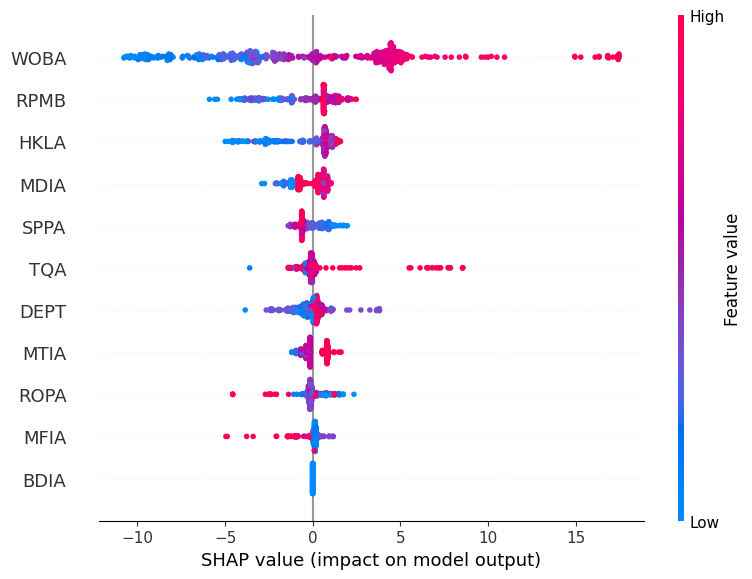

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

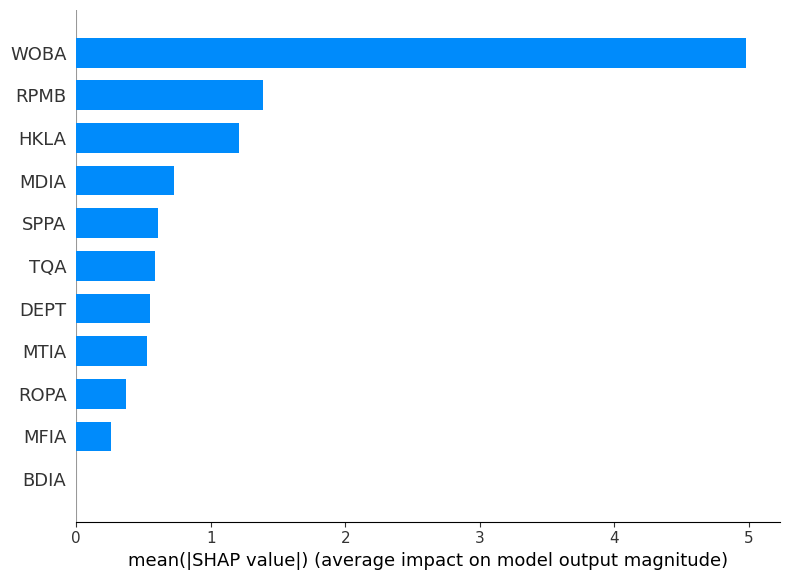

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### MLP Regressor

In [98]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), activation= 'relu', solver = 'adam', max_iter=500)

In [99]:
mlp_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)

In [100]:
y_pred = mlp_model.predict(X_test)

In [101]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'MLP Regressor', 'mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), activation= "relu", solver = "adam", max_iter=500)', erros)
erros.head()

Mean Absolute Error: 4.257289463936144
Mean Absolute percentage Error 0.3522228855512655
R2 Score 0.5861277251124726
Root Mean Squared Error 5.9867628007876705


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",6.108967,0.681236,0.138313,74.622094,8.638408
1,Support Vector Regression,"SVR(kernel = 'linear', C=1, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
2,Random Forest Regressor,RandomForestRegressor(),1.353706,0.098849,0.922067,6.748979,2.597880
3,Gradient Boosting Regressor,GradientBoostingRegressor(),1.765078,0.140349,0.901909,8.494715,2.914569
4,Decision Tree,dt_model = DecisionTreeRegressor(),1.641432,0.101807,0.863671,11.806094,3.436000


In [107]:
erros

,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'poly', C=10, epsilon = 0.1)",6.108967,0.681236,0.138313,74.622094,8.638408
1,Support Vector Regression,"SVR(kernel = 'linear', C=1, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
2,Random Forest Regressor,RandomForestRegressor(),1.353706,0.098849,0.922067,6.748979,2.597880
3,Gradient Boosting Regressor,GradientBoostingRegressor(),1.765078,0.140349,0.901909,8.494715,2.914569
4,Decision Tree,dt_model = DecisionTreeRegressor(),1.641432,0.101807,0.863671,11.806094,3.436000
7,MLP Regressor,mlp_model = MLPRegressor(hidden_layer_sizes=(1...,4.257289,0.352223,0.586128,35.841329,5.986763


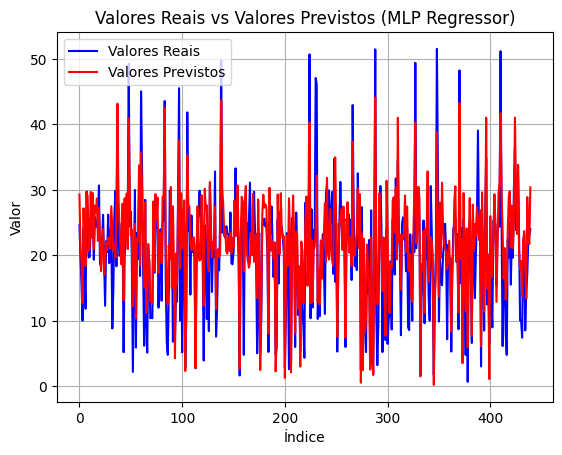

In [97]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (MLP Regressor)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### Gerando o relatório de erros

In [108]:
erros.to_csv('erros.csv', index=False)